In [1]:
import os
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
nb_epoch = 20

result_dir = '/home/yanai-lab/sugiya-y/space/study/keras/repo4/results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [3]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [4]:
if __name__ == '__main__':
    # モデルを構築
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [5]:
    # 訓練データとバリデーションデータを生成するジェネレータを作成
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        '/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/train',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        '/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
    # 訓練
    history = model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=800,
        verbose=2)

    # 結果を保存
    model.save_weights(os.path.join(result_dir, 'smallcnn.h5'))
    save_history(history, os.path.join(result_dir, 'history_smallcnn.txt'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=2, validation_data=<keras.pre..., steps_per_epoch=62, epochs=20, validation_steps=800)`
  


Epoch 1/20
99s - loss: 0.6943 - acc: 0.4995 - val_loss: 0.6925 - val_acc: 0.5038
Epoch 2/20
94s - loss: 0.6919 - acc: 0.5106 - val_loss: 0.6896 - val_acc: 0.5011
Epoch 3/20
95s - loss: 0.6840 - acc: 0.5514 - val_loss: 0.6866 - val_acc: 0.5256
Epoch 4/20
95s - loss: 0.6819 - acc: 0.5691 - val_loss: 0.6625 - val_acc: 0.5938
Epoch 5/20
94s - loss: 0.6542 - acc: 0.6265 - val_loss: 0.6498 - val_acc: 0.6115
Epoch 6/20
95s - loss: 0.6577 - acc: 0.6134 - val_loss: 0.6560 - val_acc: 0.5909
Epoch 7/20
94s - loss: 0.6405 - acc: 0.6361 - val_loss: 0.6346 - val_acc: 0.6362
Epoch 8/20
95s - loss: 0.6334 - acc: 0.6447 - val_loss: 0.6385 - val_acc: 0.6267
Epoch 9/20
94s - loss: 0.6195 - acc: 0.6633 - val_loss: 0.6131 - val_acc: 0.6736
Epoch 10/20
93s - loss: 0.6206 - acc: 0.6638 - val_loss: 0.6510 - val_acc: 0.6038
Epoch 11/20
94s - loss: 0.6003 - acc: 0.6895 - val_loss: 0.5914 - val_acc: 0.6803
Epoch 12/20
94s - loss: 0.5900 - acc: 0.6749 - val_loss: 0.5886 - val_acc: 0.6825
Epoch 13/20
96s - loss: 0

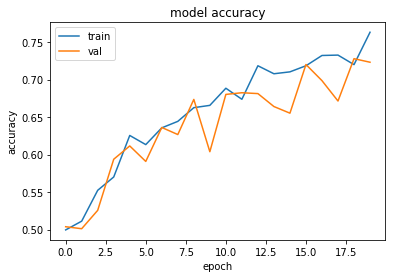

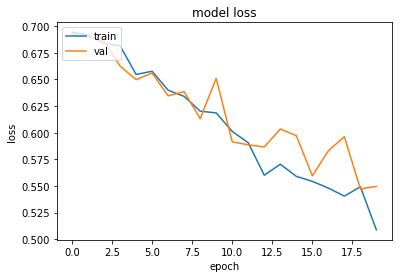

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()